# Modelo ML Adopción Digital

Buscamos desarrollar un modelo predictivo con alto grado de interpretabilidad con el fin de determinar los factores más relevantes a intervenir como parte de la estrategia. Para ello, se construyeron diferentes modelos aplicando diferentes metodologías analíticas con el fin de compararlas a partir de indicadores como R², MAE (Error Absoluto Medio), RAE (Error Relativo Absoluto), RSE (Error Relativo Cuadrático).

**Diccionario:**
* 1_Educación_y_Aprendizaje_2023: Adopción digtal para la educación y aprendizaje
* 1_IBD_Habilidades_digitales: Índice de brecha digital
* 1_avg_d_kbps: Velocidad de descarga promedio por departamento (calidad de conectividad a internet).
* 1_avg_u_kbps: Velocidad de carga promedio por departamento (calidad de conectividad a internet).
* 1_avg_lat_ms: Latencia promedio por departamento (calidad de conectividad a internet).
* 1_Relevancia_UX: Relevancia de la experiencia de usuario
* 2_Proporcion_cumplimiento_Sena: Proporción de personas inscritas sobre la meta de personas inscritas en el SENA.
* 2_Hogares_servicio_Internet_fijo: Proporción de la población que paga por servicio de internet en sus hogares
* cobertura_educacion_superior_17_21: Tasa de escolarización de jóvenes entre 17 y 21 en programas de educación superior
* cobertura_educacion_secundaria_5_16: Tasa de escolarización de niños entre 5 y 16 en programas de educación primaria, media y secundaria.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, silhouette_score
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('departamentos_modelo_pred.csv', encoding='utf-8', parse_dates=True)

In [5]:
df

,Departamentos,Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,2_avg_d_kbps,2_avg_u_kbps,2_avg_lat_ms,3_Relevancia_UX,4_Proporcion cumplimiento Sena,4_Hogares que pagan por el servicio de Internet fijo,cobertura_educacion_superior_17_21,cobertura_educacion_secundaria_5_16
0,Vichada,0.157,0.868,4225,4934,240,1515,0.8462,0.782,0.0624,0.6763
1,San Andrés,0.165,0.635,20326,9669,69,425,0.8604,0.965,0.2002,0.9600
2,Risaralda,0.204,0.509,14555,10103,54,22040,1.0000,0.874,0.6140,0.9587
3,Huila,0.240,0.606,13443,7749,59,2692,0.9612,0.849,0.4180,0.9052
4,Guaviare,0.260,0.678,10399,5881,239,3284,1.0042,0.833,0.2422,0.7756
5,Meta,0.266,0.555,14196,9235,45,6218,1.0253,0.849,0.3653,0.9243
6,Caldas,0.267,0.542,14749,10008,57,20050,0.8962,0.929,0.5532,0.8080
7,Casanare,0.268,0.631,11003,8290,51,790,0.0686,0.867,0.2658,0.9281
8,Cundinamarca,0.268,0.576,12623,8688,48,47773,1.1351,0.912,0.2954,0.9359
9,Tolima,0.268,0.585,15035,8979,48,46953,1.0134,0.900,0.4507,0.9913


In [ ]:
df.describe()

,Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,2_avg_d_kbps,2_avg_u_kbps,2_avg_lat_ms,3_Relevancia_UX,4_Proporcion cumplimiento Sena,4_Hogares que pagan por el servicio de Internet fijo,cobertura_educacion_superior_17_21,cobertura_educacion_secundaria_5_16
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.302455,0.623606,13052.424242,8948.484848,106.454545,20777.848485,0.950239,0.869030,0.378673,0.873921
std,0.061087,0.105232,4676.411879,2440.898978,117.021390,25091.816403,0.188757,0.077236,0.254578,0.099832
min,0.157000,0.276000,1297.000000,1786.000000,33.000000,425.000000,0.068600,0.626000,0.040300,0.551700
25%,0.268000,0.555000,11003.000000,8290.000000,54.000000,3284.000000,0.936500,0.835000,0.242200,0.820000
50%,0.298000,0.631000,14555.000000,9456.000000,63.000000,12549.000000,0.998100,0.888000,0.332200,0.911600
75%,0.342000,0.679000,15297.000000,10018.000000,78.000000,24201.000000,1.000000,0.921000,0.473000,0.935900
max,0.432000,0.868000,20326.000000,13253.000000,618.000000,111944.000000,1.239200,0.965000,1.407700,0.996200


In [ ]:
df.dtypes

,0
Departamentos,object
Educación_y_Aprendizaje_2023,float64
1_IBD_Habilidades_digitales,float64
2_avg_d_kbps,int64
2_avg_u_kbps,int64
2_avg_lat_ms,int64
3_Relevancia_UX,int64
4_Proporcion cumplimiento Sena,float64
4_Hogares que pagan por el servicio de Internet fijo,float64
cobertura_educacion_superior_17_21,float64


In [ ]:
df2 = df.drop(columns=df.columns[0], axis=1)
df2.head()

,Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,2_avg_d_kbps,2_avg_u_kbps,2_avg_lat_ms,3_Relevancia_UX,4_Proporcion cumplimiento Sena,4_Hogares que pagan por el servicio de Internet fijo,cobertura_educacion_superior_17_21,cobertura_educacion_secundaria_5_16
0,0.157,0.868,4225,4934,240,1515,0.8462,0.782,0.0624,0.6763
1,0.165,0.635,20326,9669,69,425,0.8604,0.965,0.2002,0.9600
2,0.204,0.509,14555,10103,54,22040,1.0000,0.874,0.6140,0.9587
3,0.240,0.606,13443,7749,59,2692,0.9612,0.849,0.4180,0.9052
4,0.260,0.678,10399,5881,239,3284,1.0042,0.833,0.2422,0.7756


### **Distribución de los datos**

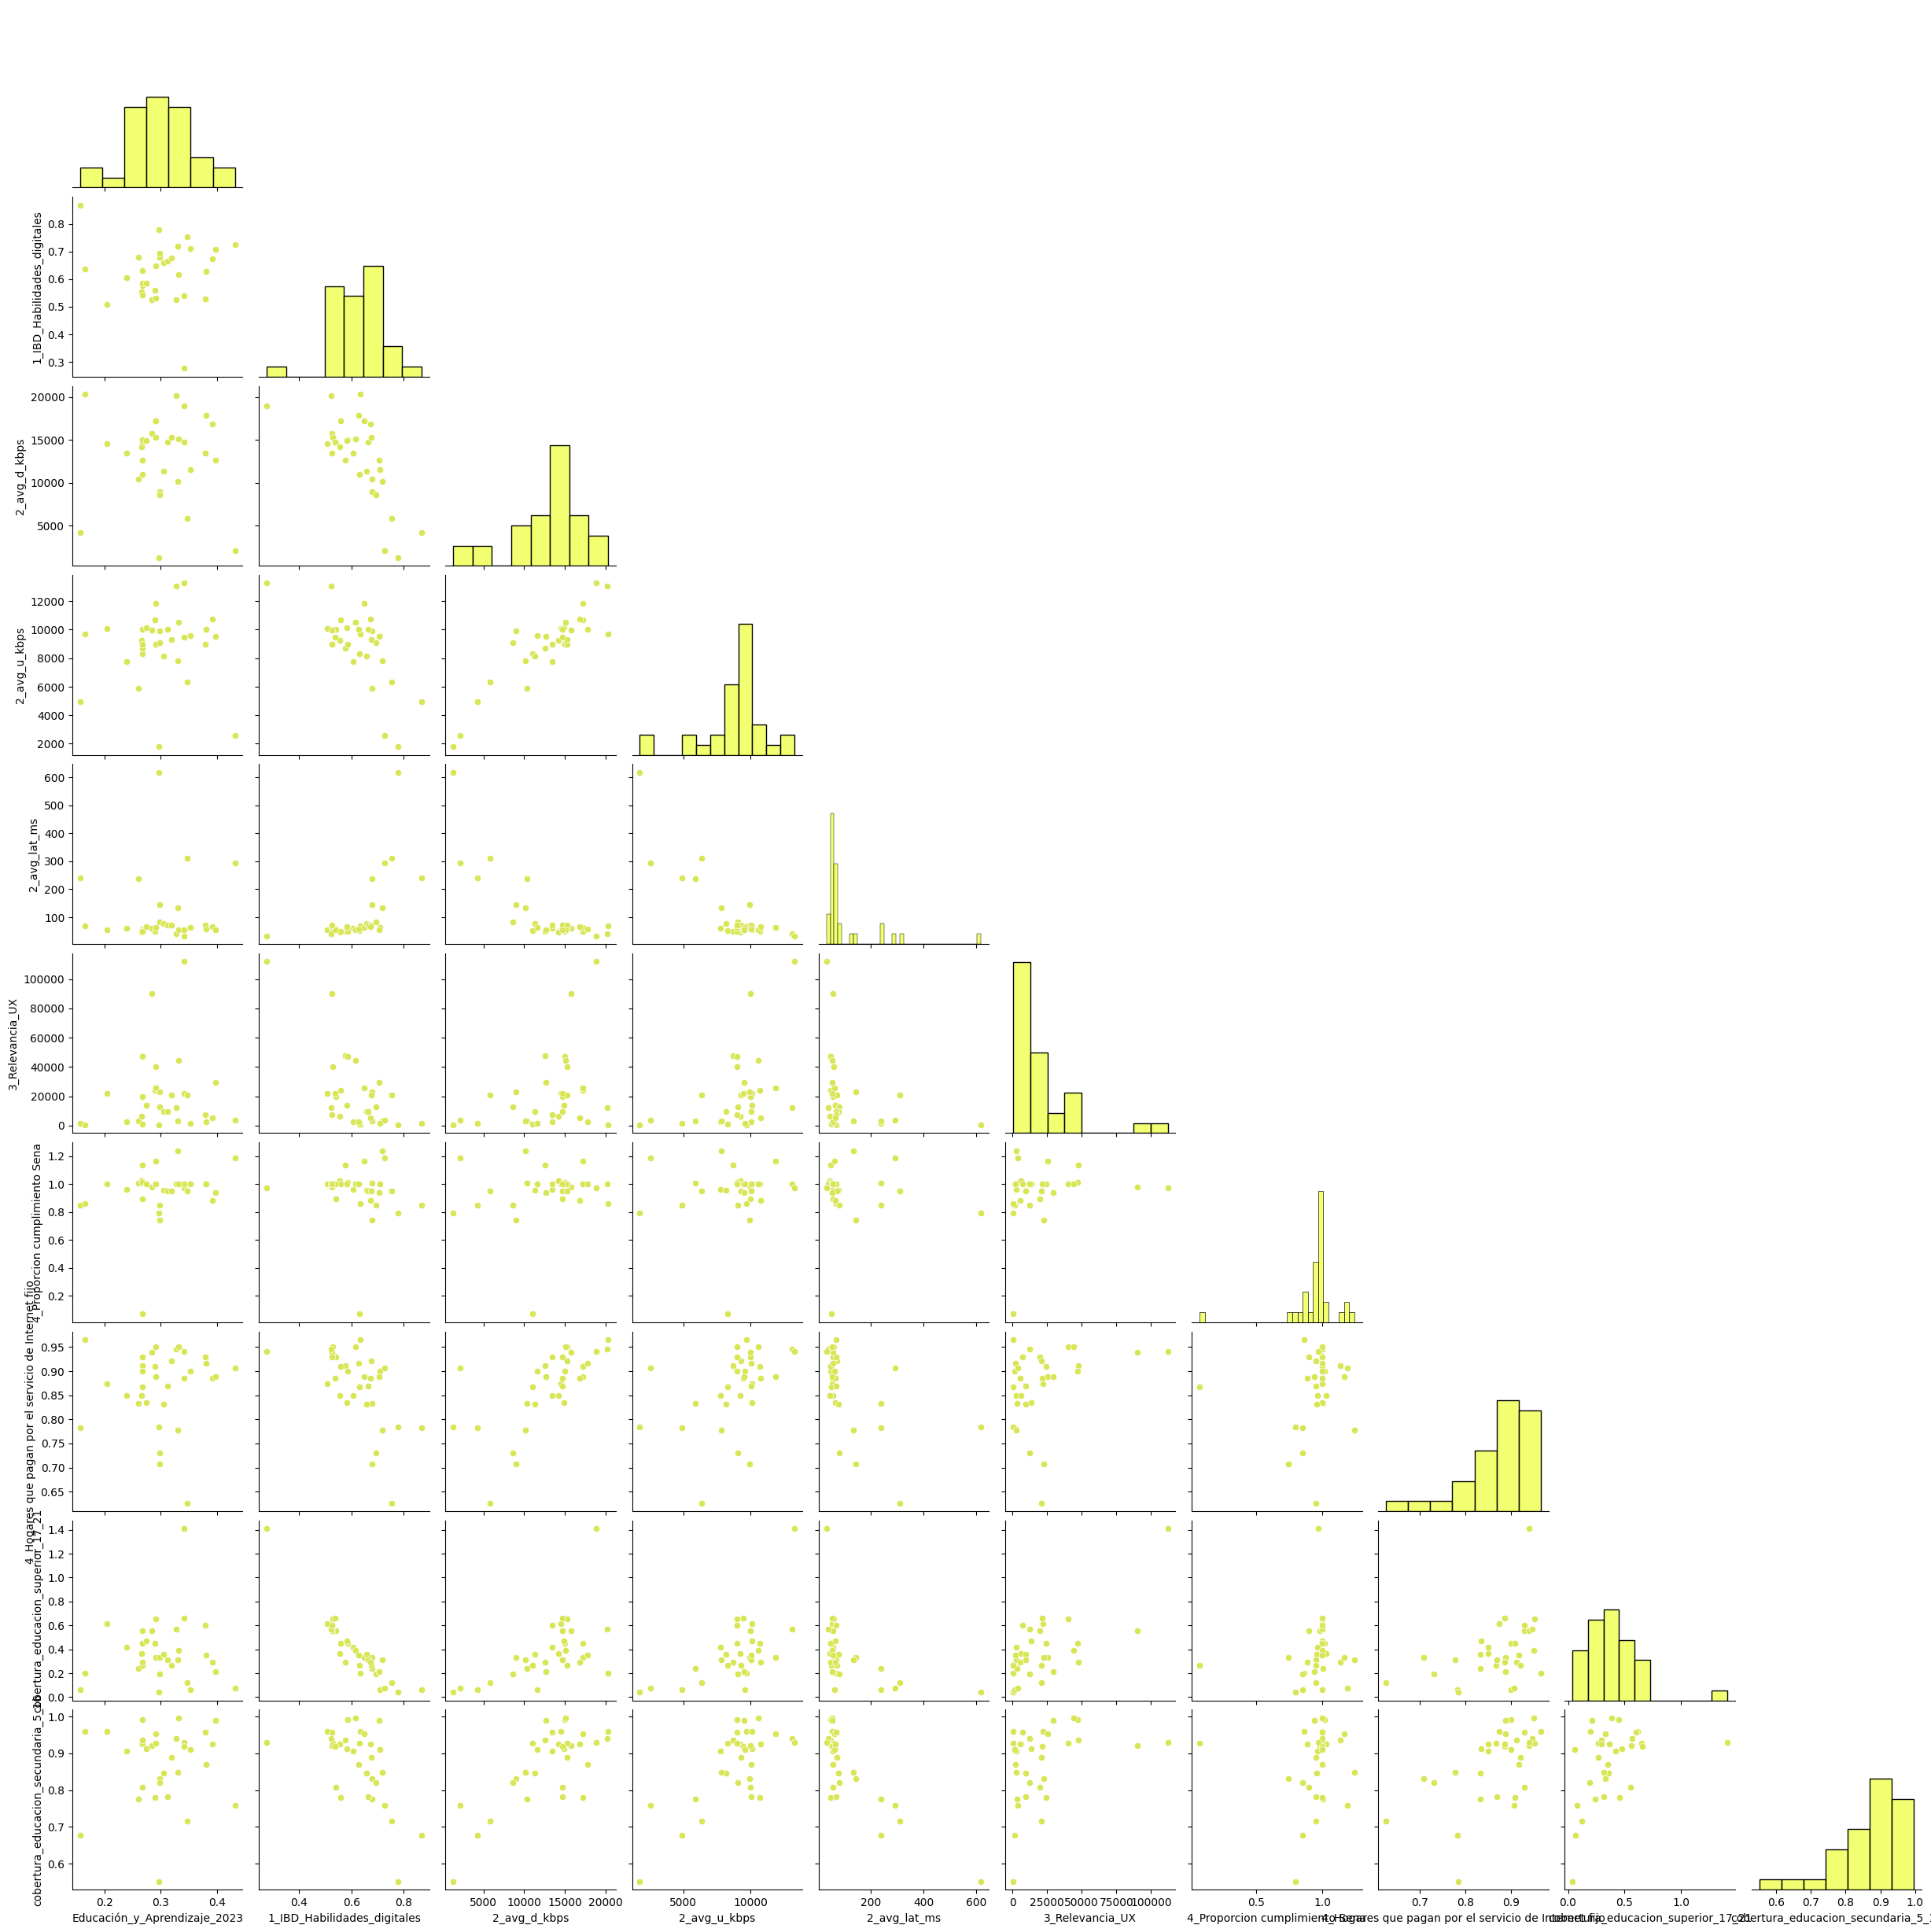

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

color_hist = '#eeff41'
color_disp = '#d8e555'

sns.pairplot(
    df2,
    kind="scatter",
    corner=True,
    plot_kws={'color': color_disp},
    diag_kws={'color': color_hist, 'fill': True}
)

# Mostrar el gráfico
plt.show()

### **Análisis de correlación**

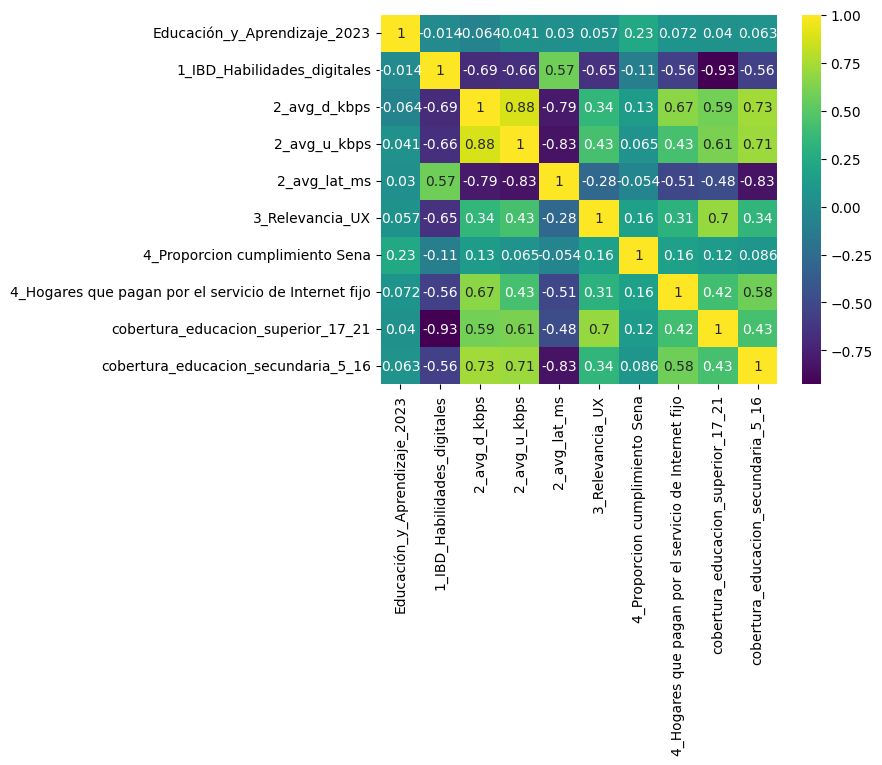

In [ ]:
matri_corr = df2.corr()
sns.heatmap(matri_corr, cmap="viridis", annot=True)
plt.show()

* Se decide eliminar la variable '1_avg_lat_ms' del modelo ya que presenta una alta correlación con las variables '1_avg_d_kbps', '1_avg_u_kbps' y 'Cobertura educación secundaria'.
* También se elimina la variable 'cobertura_educacion_superior_17_21' debido a su alta correlación con la variable '1_IBD_Habilidades_Digitales'

In [ ]:
from sklearn.preprocessing import StandardScaler

# Estandarización de variables - NO UTILIZADO
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df2)
df_standardized = pd.DataFrame(standardized_features, columns=df2.columns)

# Separar las variables predictoras (X) de la variable objetivo (y)
X = df2.drop(columns=['Educación_y_Aprendizaje_2023','2_avg_lat_ms','cobertura_educacion_superior_17_21'], axis=1)
# X = df_standardized[['1_IBD_Habilidades_digitales','2_avg_u_kbps','3_Relevancia_UX','4_Proporcion cumplimiento Sena','4_Hogares que pagan por el servicio de Internet fijo','cobertura_educacion_superior_17_21']]
# X = df_standardized.drop(columns=['Educación_y_Aprendizaje_2023','2_avg_lat_ms'], axis=1)
y = df2['Educación_y_Aprendizaje_2023']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Árbol de decisión**

In [ ]:
# Seleccionar los mejores hiperparámetros para el árbol de decisión

from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(random_state=42) # o DecisionTreeRegressor(random_state=42)

# Define la grilla de hiperparámetros a explorar
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    #'criterion': ['gini', 'entropy'] # Para clasificación
    'criterion': ['squared_error', 'friedman_mse'] # Para regresión
}

# Inicializa GridSearchCV
grid_search = GridSearchCV(estimator=tree,
                           param_grid=param_grid,
                           cv=5,  # Número de folds para la validación cruzada
                           #scoring='accuracy', # Métrica de evaluación para clasificación
                           scoring='neg_mean_squared_error', # Métrica para regresión
                           verbose=2, # Muestra el progreso
                           n_jobs=-1) # Utiliza todos los núcleos de la CPU

# Ejecuta la búsqueda de grilla
grid_search.fit(X_train, y_train)

# Obtén los mejores hiperparámetros y el mejor modelo
best_params_ = grid_search.best_params_
best_model_ = grid_search.best_estimator_

print(f'Mejores hiperparámetros encontrados: {best_params_}')

# Evalúa el mejor modelo en el conjunto de prueba
# best_accuracy_ = best_model_.score(X_test, y_test) # Para clasificación
best_mse_ = mean_squared_error(y_test, best_model_.predict(X_test)) # Para regresión
print(f'MSE del mejor modelo en el conjunto de prueba: {best_mse_:.2f}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros encontrados: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
MSE del mejor modelo en el conjunto de prueba: 0.01


Error cuadrático medio (MSE): 0.01
R²: -0.55
MAE (Error Absoluto Medio): 0.06
RAE (Error Relativo Absoluto): 1.40
RSE (Error Relativo Cuadrático): 1.55


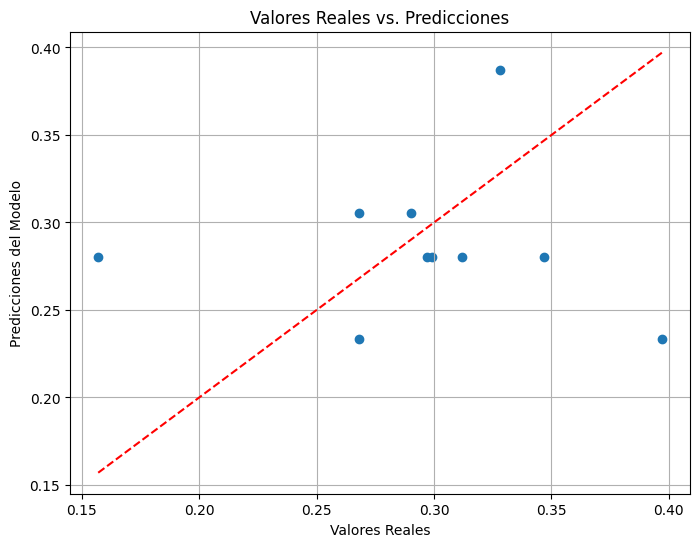

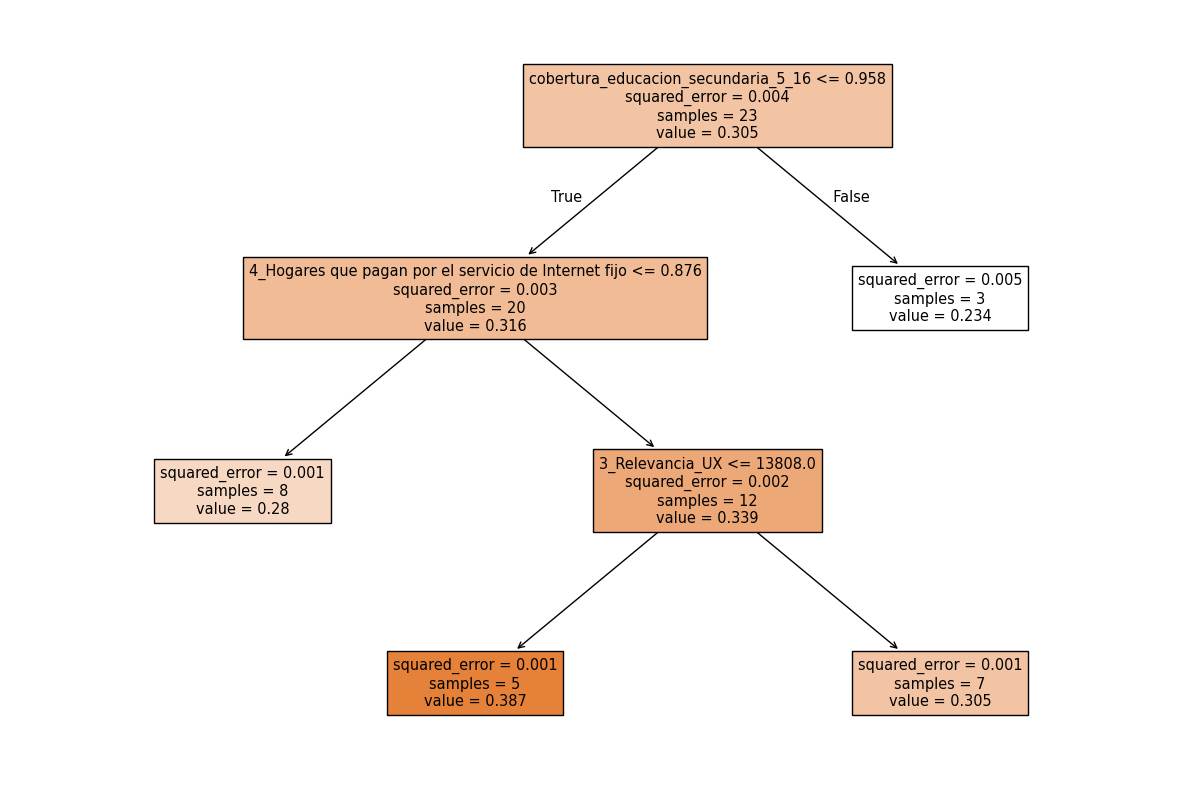

In [ ]:
regressor = DecisionTreeRegressor(random_state=42,min_samples_leaf= 3, min_samples_split=10)
regressor.fit(X_train, y_train)
#Realizar predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el rendimiento del modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
rse = np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

# Imprimir resultados
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RAE (Error Relativo Absoluto): {rae:.2f}")
print(f"RSE (Error Relativo Cuadrático): {rse:.2f}")

# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.title('Valores Reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Línea de referencia
plt.grid(True)
plt.show()

# Visualizar el árbol de decisión de regresión (opcional, para entender el modelo)
plt.figure(figsize=(15, 10))
from sklearn.tree import plot_tree
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.show()

**SVM**

In [ ]:
# Define la grilla de hiperparámetros a explorar
param_grid = {
    'n_estimators': [10,50,100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'loss': ['squared_error', 'huber']
}

# Inicializa el modelo GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Inicializa GridSearchCV
grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           cv=5,  # Número de folds para la validación cruzada
                           scoring='neg_mean_squared_error', # Métrica para regresión
                           verbose=2,
                           n_jobs=-1) # Utiliza todos los núcleos de la CPU

# Ejecuta la búsqueda de grilla
grid_search.fit(X_train, y_train)

# Obtén los mejores hiperparámetros y el mejor modelo
best_params_ = grid_search.best_params_
best_model_ = grid_search.best_estimator_

print(f'Mejores hiperparámetros encontrados: {best_params_}')

# Evalúa el mejor modelo en el conjunto de prueba
y_pred = best_model_.predict(X_test)
best_mse_ = mean_squared_error(y_test, y_pred)
print(f'MSE del mejor modelo en el conjunto de prueba: {best_mse_:.4f}')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Mejores hiperparámetros encontrados: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10, 'subsample': 1.0}
MSE del mejor modelo en el conjunto de prueba: 0.0035


Error cuadrático medio (MSE): 0.00
R²: -0.10
MAE (Error Absoluto Medio): 0.04
RAE (Error Relativo Absoluto): 1.10
RSE (Error Relativo Cuadrático): 1.10


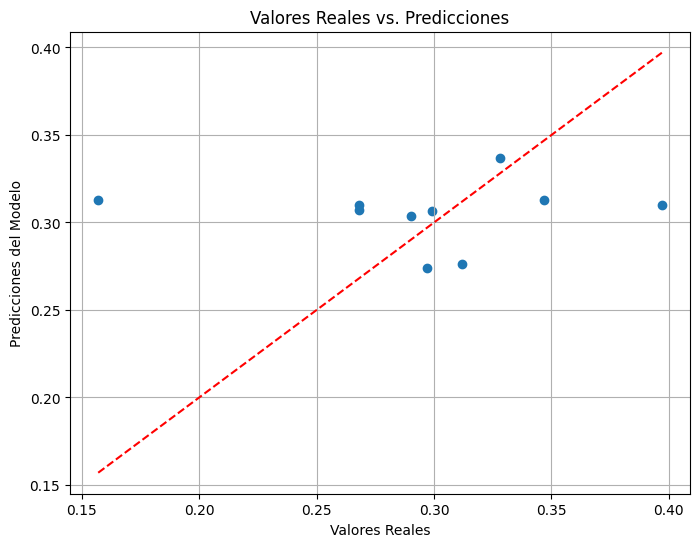

In [ ]:
# Inicializar el modelo Gradient Boosting para regresión
gbr = GradientBoostingRegressor(n_estimators=10,       # Número de árboles a construir 5
                                learning_rate=0.1,     # Tasa de aprendizaje
                                max_depth=4,           # Profundidad máxima de cada árbol 3
                                min_samples_leaf=1,
                                min_samples_split=4,
                                subsample=1.0,
                                random_state=42)       # Para reproducibilidad

# Entrenar el modelo con los datos de entrenamiento
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

# Evaluar el rendimiento del modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
rse = np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

# Imprimir resultados
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RAE (Error Relativo Absoluto): {rae:.2f}")
print(f"RSE (Error Relativo Cuadrático): {rse:.2f}")

# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.title('Valores Reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Línea de referencia
plt.grid(True)
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor #RandomForestClassifier # o RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

feature_importances = pd.Series(model_rf.feature_importances_, index = X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
print("Importancia de las características (Random Forest):\n", sorted_importances)

# Puedes seleccionar las 'k' características más importantes
k = 3
top_features_rf = sorted_importances.head(k).index.tolist()
print("\nTop", k, "características por importancia (Random Forest):", top_features_rf)

Importancia de las características (Random Forest):
 4_Hogares que pagan por el servicio de Internet fijo    0.298783
3_Relevancia_UX                                         0.286328
cobertura_educacion_secundaria_5_16                     0.262951
1_IBD_Habilidades_digitales                             0.151939
dtype: float64

Top 3 características por importancia (Random Forest): ['4_Hogares que pagan por el servicio de Internet fijo', '3_Relevancia_UX', 'cobertura_educacion_secundaria_5_16']


Error cuadrático medio (MSE): 0.01
R²: -0.55
MAE (Error Absoluto Medio): 0.04
RAE (Error Relativo Absoluto): 1.10
RSE (Error Relativo Cuadrático): 1.55


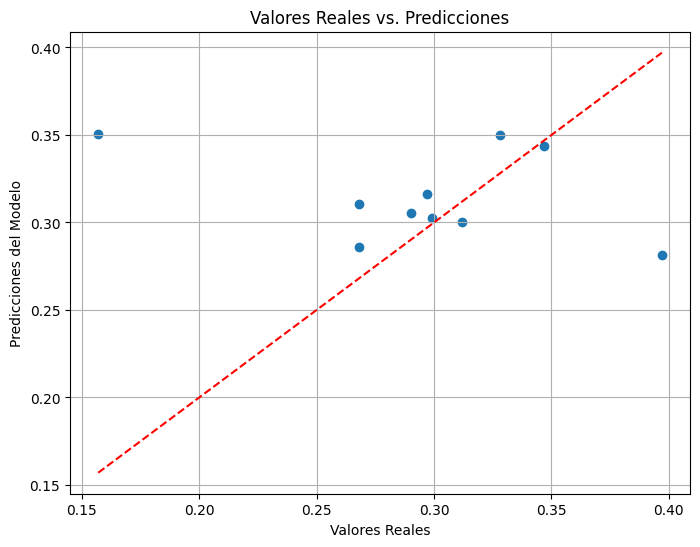

In [ ]:
# 2. Divide los datos en conjuntos de entrenamiento y prueba
X2 = df2[['4_Hogares que pagan por el servicio de Internet fijo','cobertura_educacion_secundaria_5_16', '3_Relevancia_UX','1_IBD_Habilidades_digitales']]
y2 = df2['Educación_y_Aprendizaje_2023']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# 3. Inicializa y entrena el modelo Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42) # n_estimators=100,
rf_model.fit(X_train, y_train)

# 4. Realiza predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)


# Evaluar el rendimiento del modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
rse = np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

# Imprimir resultados
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RAE (Error Relativo Absoluto): {rae:.2f}")
print(f"RSE (Error Relativo Cuadrático): {rse:.2f}")

# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.title('Valores Reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Línea de referencia
plt.grid(True)
plt.show()

**Regresión Lineal**

In [ ]:
# Seleccionar las Mejores Variables
adopcion_correlation = abs(matri_corr['Educación_y_Aprendizaje_2023']).sort_values(ascending=False)
print(adopcion_correlation)

# Selecciona las 'k' variables principales (excluyendo la variable objetivo)
k = 5
top_features_corr = adopcion_correlation[1:k+1].index.tolist()
print("\nTop", k, "variables por correlación:", top_features_corr)

Educación_y_Aprendizaje_2023                            1.000000
4_Proporcion cumplimiento Sena                          0.229047
4_Hogares que pagan por el servicio de Internet fijo    0.072120
2_avg_d_kbps                                            0.063673
cobertura_educacion_secundaria_5_16                     0.062560
3_Relevancia_UX                                         0.056791
2_avg_u_kbps                                            0.041200
cobertura_educacion_superior_17_21                      0.040127
2_avg_lat_ms                                            0.029929
1_IBD_Habilidades_digitales                             0.014162
Name: Educación_y_Aprendizaje_2023, dtype: float64

Top 5 variables por correlación: ['4_Proporcion cumplimiento Sena', '4_Hogares que pagan por el servicio de Internet fijo', '2_avg_d_kbps', 'cobertura_educacion_secundaria_5_16', '3_Relevancia_UX']


Error cuadrático medio (MSE): 0.005088461607467043
R²: -1.6290980900813463
MAE (Error Absoluto Medio): 0.06233602060792157
RAE (Error Relativo Absoluto): 1.8184370072322509
RSE (Error Relativo Cuadrático): 2.6290980900813463
Coeficientes: [ 1.41801116e-01 -6.24148382e-06 -3.91392161e-07  8.27487560e-02
  2.63564764e-01]
Intercepto: -0.05481562908071491


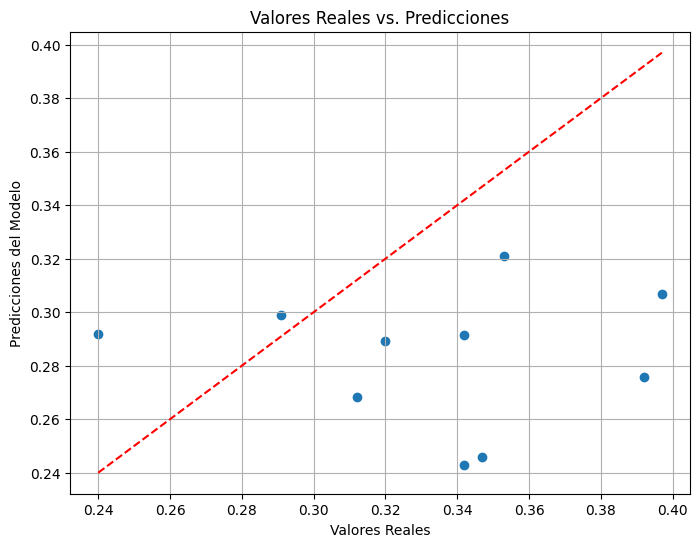

In [ ]:
# Selecciono predictores
X = df2[['cobertura_educacion_secundaria_5_16',
             '2_avg_d_kbps',
             '3_Relevancia_UX',
             '4_Proporcion cumplimiento Sena',
             '4_Hogares que pagan por el servicio de Internet fijo']]

# Variable dependiente (a predecir)
y = df2['Educación_y_Aprendizaje_2023']

# Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
rse = np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

# Imprimir resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"R²: {r2}")
print(f"MAE (Error Absoluto Medio): {mae}")
print(f"RAE (Error Relativo Absoluto): {rae}")
print(f"RSE (Error Relativo Cuadrático): {rse}")

# Coeficientes del modelo
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.title('Valores Reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Línea de referencia
plt.grid(True)
plt.show()

### Conclusiones 
Acorde al desempeño de los modelos ambos modelos (Regresión Lineal y Random Forest) arrojan un R2 negativo, lo cual indica que ninguno de los dos se está ajustando bien a los datos. Sin embargo, el modelo Random Forest presenta mejor desempeño de las métricas de evaluación lo cual muestra claramente que éste último capta mejor las no linealidades de nuestro dataframe.

En este sentido, proponemos estructurar una estrategia focalizada en los departamentos previamente seleccionados mediante el análisis de clústeres. Cabe destacar que en estas regiones el pago por servicios de Internet suele ser bajo, lo que se traduce en una calidad de conexión limitada. Este constituye uno de los principales retos a resolver. Por ello, sugerimos evaluar la implementación de una estrategia similar a Colombia Aprende Móvil, iniciativa en la cual se estableció un convenio con los proveedores de servicios de Internet para permitir el acceso gratuito al portal educativo. Este enfoque podría resultar altamente efectivo en los territorios priorizados.